<h1 style='color:#ff914d' align='center'>Prédiction des SPAM et HAM</h1>


> # Plan de travail

1. Contexte du projet
2. Analyse exploratoire des données (EDA)
4. Prétraitement des données (Pre-processing)
5. Modélisation
6. Prédiction / Recommandations

> # 1. Contexte du projet

Les messages de spam sont non seulement des nuisances, mais ils peuvent également représenter une menace pour la sécurité en volant des informations personnelles, en propageant des logiciels malveillants et en tentant des escroqueries. Par conséquent, il est essentiel d'établir un système efficace de prédiction et de signalement des messages de spam. 

* Ce projet vise précisément à résoudre ce problème en utilisant l'apprentissage autoumatique (Machine Learning) afin de construire **un modèle qui peut faire la distinction avec précision entre les messages Ham et les messages de Spam.**

> # 2. Analyse exploratoire des données (EDA)

## Importer les librairies nécessaires 

In [20]:
import pandas as pd #Traitement des dataframes 
import numpy as np #Algebre Lineaire 
import matplotlib.pyplot as plt
import seaborn as sns #Visualisation Statistique
import warnings
warnings.filterwarnings("ignore")

## Préparation des données

* **Charger le dataset dans un dataframe**

In [21]:
#spam est notre dataframe
spam = pd.read_csv("spam.csv", encoding = "ISO-8859-1")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


   <h4 style='color:red'>Remarque:</h4>

- ASCII : 7 bits. 128 points de code.

- ISO-8859-1: 8 bits. 256 points de code.

- UTF-8 : 8-32 bits (1-4 octets). 1 112 064 points de code.

- ISO-8859-1 et UTF-8 sont rétrocompatibles avec ASCII, mais UTF-8 n’est pas rétrocompatible avec ISO-8859-1.

* **Voir plus d'information sur nos variables**

In [22]:
 spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


* **Calculer le nombre des valeurs nulles**

In [23]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

- **Supprimer les valeurs nulles**

In [24]:
df=spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **Renommer nos variables restantes (v1 et v2)**

In [25]:
df.rename(columns={"v1": "SPAMvsHAM", "v2": "Message"}, inplace=True)
df.head()

,SPAMvsHAM,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 * **Vèrifier la taille du dernier dataframe**

In [26]:
df.shape

(5572, 2)

## Visualisation des données 

- **Visualiser la première colonne de "SPAMvsHAM"**

Text(0.5, 1.0, 'Nombre de messages Email SPAM et HAM')

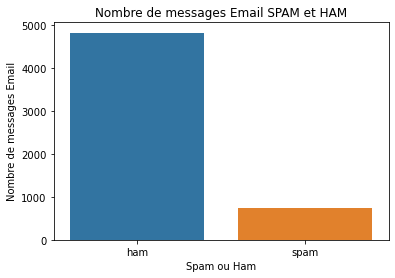

In [27]:
sns.countplot(df.SPAMvsHAM)
plt.xlabel('Spam ou Ham')
plt.ylabel('Nombre de messages Email')
plt.title('Nombre de messages Email SPAM et HAM')

> # 3. Prétraitement des données "Preprocessing"

Le prétraitement fait référence aux **transformations** appliquées à nos données avant de les alimenter dans l’algorithme. Le prétraitement des données est une technique utilisée pour convertir les données **brutes** en un ensemble de données **propre.* 

- Si les données non structurées sont utilisées dans des modèles Machine Learning pour analyser ou prédire, la prédiction sera fausse car les données non structurées contiennent des valeurs manquantes et des données indésirables. Donc, pour une bonne prédiction, les données doivent être prétraitées.

Pour ce faire, on doit utiliser une bibliothèque Python open source très puissante **Scikit-learn**, labelisée: ***sklearn**.

<h3 style='color:purple'>Scikit-learn</h3> 
    
    C'est une bibliothèque Python open source qui implémente une gamme d’algorithmes d’apprentissage automatique, de prétraitement, de validation croisée et de visualisation à l’aide d’une interface unifiée. Elle prend en charge l’apprentissage automatique supervisé et non supervisé, fournissant divers algorithmes pour la classification, la régression, le clustering et la réduction de dimensionnalité. La bibliothèque est construite à l’aide de nombreuses bibliothèques telles que NumPy et SciPy. Elle fonctionne également bien avec d’autres bibliothèques, telles que Pandas et Seaborn.

Dans ce projet et à cette étape, nous allons convertir la colonne catégorielle de **SPAMvsHAM** en une colonne numérique où *Spam=1* et *Ham=0* et nous avons choisi la technique de Label Encoding. Voir ci-dessous: 

## Numérisation des variables (Label Encoding)

* Label Encoding ou l'encodage d'étiquettes est une technique utilisée pour convertir des colonnes catégorielles en colonnes numériques afin qu’elles puissent être ajustées par des modèles d’apprentissage automatique qui ne prennent que des données numériques. Il s’agit d’une étape de prétraitement importante dans un projet d’apprentissage automatique.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
inputs_X = df.Message
target_Y = df.SPAMvsHAM
le = LabelEncoder()
target_Y = le.fit_transform(target_Y)
target_Y = target_Y.reshape(-1,1) # Remodeler target_Y en n lignes et une colonne

In [30]:
target_Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

## Division en jeu de données Train et Test 

Ici, nous arrivons à l'étape de division de notre jeu de données en ensemble ***Train*** (validation) et ***Test.***
La division train-test est utilisée pour estimer les performances des algorithmes d’apprentissage automatique applicables aux algorithmes/applications basés sur la prédiction. 
  Son objectif est de pouvoir comparer les résultats de notre propre modèle d’apprentissage automatique aux résultats de la machine. Par défaut, l’ensemble de tests est divisé en 30 % des données réelles et l’ensemble d’apprentissage (d'entrainement/validation) est divisé en 70 % des données réelles.

- *L'ensemble de test est uniquement utilisé pour les prédictions.*

La bibliothèque **scikit-learn** nous fournit le module **model_selection** dans lequel nous avons la fonction de division **train_test_split().**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs_X, target_Y, test_size = 0.2, random_state = 30)

**random state: int, RandomState instance ou None, default=None**  
Contrôle la lecture aléatoire appliquée aux données avant d’appliquer le fractionnement. Passez un int pour une sortie reproductible sur plusieurs appels de fonction. 

In [33]:
# Voir les taille des différentes variables
print(inputs_X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


## Extraction des caractéristiques / fonctionnalités

La mise à l’échelle des caractéristiques est une technique utilisée pour normaliser les variables indépendantes.
- Le but est d'extraire des fonctionnalités dans un format pris en charge par des algorithmes d’apprentissage automatique à partir d’ensembles de données composé de formats tels que: texte et image.  

Nous appelons **TfidfVectorizer**, le processus général de transformation d’une collection des documents texte en vecteurs d’entités numériques.  En d'autre terme, *convertir une collection de documents bruts en une matrice de fonctionnalités TF-IDF.*
- Les documents sont décrits par mot tout en ignorant complètement les informations relatives à la position des mots du document. 

<h4 style='color:red'>Exemple sur 'TfidfVectorize'</h4>

**Pour notre cas!** Transformons les données texte **inputs_X** à des vecteurs fonctionnalités qui peuvent être utilisés comme des variables explicatives (des entrées) pour les différents modèles que nous déployerons par la suite.  

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
feature_extraction=TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

**min_df=1:** Si le mot est repete qu'une seule fois, nous pouvons l'ignorer car il ne sera pa utile pour notre prediction, de plus, il ne va figurer dans la liste des mots de sortie.  
**stop_words='english':** S’il s’agit d’une chaîne, elle est transmise à _check_stop_list et le stop approprié est renvoyée.'English' est actuellement la seule chaîne prise en charge valeur. Il contient tout les mots en anglais qui ne peuvent pas etre utile pour notre requêtte, tels que: etc, is, was, ... Donc, ils seront ignorés.   
**lowercase='True', par defaut=True:** Convertir tous les caractères en minuscules avant de les tokeniser (vectoriser).

In [36]:
#Transformer et Entrainer les données de X_train et X_test à des vecteurs de données numériques.
X_train_features=feature_extraction.fit_transform(X_train) 
X_test_features=feature_extraction.transform(X_test)

#Unifier également Y_train et Y_test à des valeurs de type entier
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

> # 4. Modélisation

<h2 style='color:orange'; align='center'>Application du modèle de Régression Logistique</h2>

## Entrainement du modèle 

In [37]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [38]:
# Entrainer le modèle de Régression Logistique en utilisant les données de validation 'Train'
model1.fit(X_train_features, Y_train)

LogisticRegression()

## Evaluation du modèle 

<h6 style='color:tan'>  Données de validation </h6>

In [39]:
# Prédiction avec les données X_train_features
prediction_X_train = model1.predict(X_train_features)
prediction_X_train 

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Calculer leur précision 
from sklearn.metrics import accuracy_score
accuracy_X_train = accuracy_score(Y_train, prediction_X_train)
print('La précision des données de validation X_train_features est à : ', accuracy_X_train,'%')

La précision des données de validation est à :  0.9699349338119811 %


<h6 style='color:tan'>  Données de test </h6>

In [41]:
# Prédiction avec les données de test 'X_test_features'
prediction_X_test = model1.predict(X_test_features)
prediction_X_test

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
# Leur précision
accuracy_X_test = accuracy_score(Y_test, prediction_X_test)
print('La précision des données de test X_test_features est à : ', accuracy_X_test, '%')

La précision des données de test est à :  0.9560538116591928 %


<h2 style='color:orange'; align='center'>Application du modèle de Naive Bayes</h2>

## Entrainement du modèle 

In [43]:
from sklearn.naive_bayes import MultinomialNB

* **MultinomialNB; Naive Bayes multinomial:** Les vecteurs de caractéristiques (features) représentent les fréquences avec lesquelles certains événements ont été générés par une distribution multinomiale. Il s’agit du modèle d’événement généralement utilisé pour la classification des documents.

In [44]:
model2 = MultinomialNB()
model2=model2.fit(X_train_features, Y_train)

## Evaluation du modèle 

In [46]:
prediction2=model2.predict(X_test_features)
prediction2

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
accuracy2_X_test = accuracy_score(Y_test, prediction2)
print('La précision donnée par Naive Bayes est à : ', accuracy2_X_test,'%')

La précision donnée par Naive Bayes est à :  0.968609865470852 %


> <h4 style='color:#ef8137'> IDEE! </h4> <h5 style='color:#682d05'> Pouvons-nous avoir un rapport complet sur toutes les métriques de performance en une ligne de code !?  </h5>

<h5 style='color:#ef8137'> <blockquote> Bien sûr! En utilisant Classification Report </blockquote> </h5>

<h5 style='color:#682d05'>Qu’est-ce qu’un rapport de classification?</h5>

Comme son nom l’indique, c’est le rapport qui explique tout sur la classification. Il s’agit du résumé de la qualité de la classification effectuée par le modèle ML construit. Il comprend principalement 5 colonnes et (N+3) lignes. La première colonne est le nom de l’étiquette de classe et est suivie de Précision, Recall, F1-score et Support. N lignes sont pour les étiquettes de classe N et les trois autres lignes sont pour la précision, la moyenne macro et la moyenne pondérée.

**Précision:** Il est calculé par rapport aux valeurs prévues. Pour la classe A, sur le total des prédictions, combien appartenaient réellement à la classe A dans l’ensemble de données réel, est défini comme la précision. C’est le rapport de la matrice de confusion de la cellule [i][i] et de la somme de la colonne [i].

**Recall:** Il est calculé par rapport aux valeurs réelles dans l’ensemble de données. Pour la classe A, sur le nombre total d’entrées dans l’ensemble de données, le nombre d’entrées réellement classées dans la classe A par le modèle ML est défini comme le rappel. C’est le rapport de la matrice de confusion de la cellule [i][i] et de la somme de la ligne [i].

**Score F1:** C’est le moyen harmonique de précision et de rappel.

**Support:** Il s’agit du nombre total d’entrées de chaque classe dans le jeu de données réel. C’est simplement la somme des lignes pour chaque classe i.

In [60]:
from sklearn.metrics import classification_report

rap_classification=classification_report(Y_test, prediction2)
print('Voici la rapport de classification du modèle Naive Bayes:', rap_classification)

Voici la rapport de classification du modèle Naive Bayes:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       970
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



<h2 style='color:orange'; align='center'>Application du modèle de Support Vector Machine (SVM)</h2>


## Entrainement du modèle 

In [49]:
from sklearn import svm

In [50]:
classificateur = svm.SVC(kernel='linear')
model3 = classificateur.fit(X_train_features, Y_train)
model3

SVC(kernel='linear')

## Evaluation du modèle 

In [51]:
prediction3 = model3.predict(X_test_features)
prediction3

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
accuracy3_X_test = accuracy_score(Y_test, prediction3)
print('La précision donnée par le modele SVM est à : ',accuracy3_X_test,'%')

La précision donnée par le modele SVM est à :  0.9811659192825112 %


In [53]:
rap_classification3=classification_report(Y_test, prediction3)
print('Voici la rapport de classification du modèle Support Vector Machine:', rap_classification3)

Voici la rapport de classification du modèle Support Vector Machine:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.98      0.88      0.92       145

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<h2 style='color:#e26a1a'; align='center'>Évaluation comparative de la précision des modèles ML appliqués</h2> 

,Modèle,Précision
2,SVM,0.981166
1,NB,0.968610
0,LB,0.956054


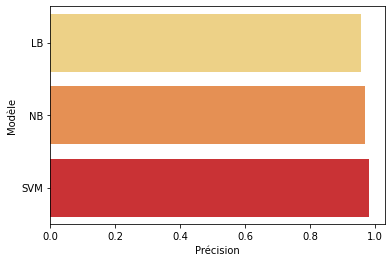

In [75]:
models = pd.DataFrame({
    'Modèle':['LB','NB', 'SVM'],
    'Précision' :[accuracy_X_test ,accuracy2_X_test, accuracy3_X_test]
})
sns.barplot(x='Précision', y='Modèle', data=models, palette="YlOrRd")
models.sort_values(by='Précision', ascending=False)

<h3 style='color:#e24a0e'> Conclusion </h3>

Nous avons donc essayé la Regression Logistique, Naive Bayes, SVM et le plus précis semble être: SVM.
- La précision donnée par le modèle SVM est à :  98 %
- La précision donnée par Naive Bayes est à :  97 %
- La précision des données de test est à :  96 %

<h2 style='color:#e26a1a'; align='center'>Représentation graphique de la qualité du modèle SVM </h2> 


> ## Matrice de confusion 
- Une matrice de confusion est une matrice qui résume les performances d’un modèle d’apprentissage automatique sur un ensemble de données de test. Il est souvent utilisé pour mesurer les performances des modèles de classification, qui visent à prédire une étiquette catégorielle pour chaque instance d’entrée. La matrice affiche le nombre de vrais positifs (VP), de vrais négatifs (VN), de faux positifs (FP) et de faux négatifs (FN) produits par le modèle sur les données de test.

- Pour la classification binaire, la matrice sera d’une table 2X2, Pour la classification multi-classes, la forme de la matrice sera égale au nombre de classes, c’est-à-dire que pour n classes, ce sera nXn.

In [55]:
from sklearn.metrics import confusion_matrix

- **Représentation graphique de la performance du modèle SVM.**

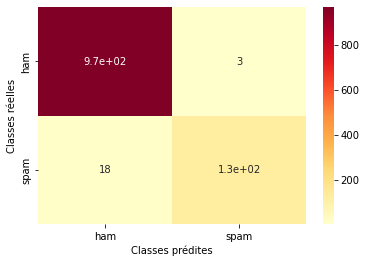

In [79]:
cm = confusion_matrix(Y_test, prediction3).astype(int)
sns.heatmap(cm, annot=True, cmap='YlOrRd',
xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel("Classes prédites")
plt.ylabel("Classes réelles")
plt.show()

<h4 style='color:#e24a0e'>Interprétation:</h4>

SVM n’a prédit que trois messages comme faux positifs et mal classé 18 messages de spam comme ham, c'est *très peu* comme résultat donc, ce qui en fait l’algorithme le plus réussi pour cette tâche.

> # 5. Système de prédiction

In [90]:
# Construire un système de prédiction 
mail_contenu = ["You have been chosen as the winner of an international lottery - claim your prize!"]
# Vous pouvez esseyez d'autres messages, tels que:
"Don't miss this exclusive offer: buy an iPhone at half the price!"
"Double your investment in one week with our automated trading system."
"Check your bank account now and protect your sensitive information."
"Win an all-inclusive trip to an exotic destination by completing this survey."

# Convertir le texte en un vecteur de caractéristiques
input_data_features = feature_extraction.transform(mail_contenu)

# Prédire en utilisant notre meilleur modèle 'SVM'

prediction = model3.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Un mail Spam')

else:
  print('Un mail Ham')

[1]
Un mail Spam


# MERCI POUR VOTRE ATTENTION